In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 6 # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # carma_varian

Text(0,0.5,'magnitud')

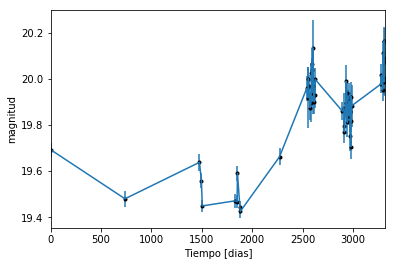

In [2]:
data = np.genfromtxt('LC_U_141827.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=6, q=4)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

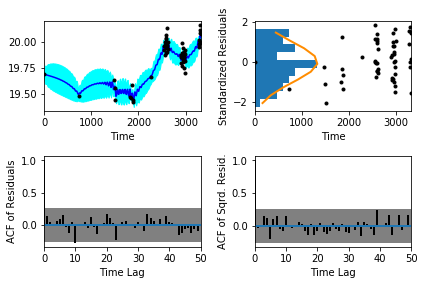

In [5]:
sample.assess_fit()

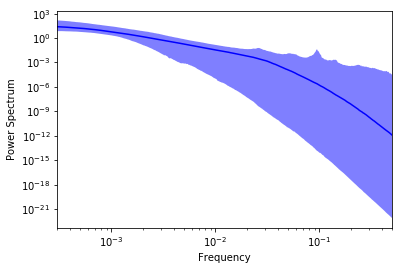

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.302231,'Nivel de ruido')

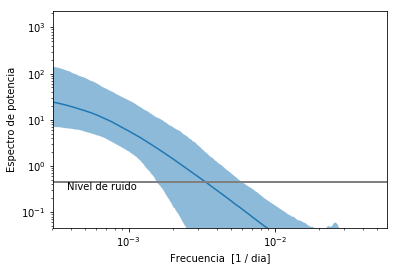

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

In [9]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [10]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 6)

In [11]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 434.08577546
Median: 0.19090921199
Standard deviation: 0.280640826248
68% credibility interval: [ 0.01113363  0.60686831]
95% credibility interval: [ 0.         0.9266745]
99% credibility interval: [ 0.          0.99598617]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 434.08577546
Median: 0.19090921199
Standard deviation: 0.280640826248
68% credibility interval: [ 0.01113363  0.60686831]
95% credibility interval: [ 0.         0.9266745]
99% credibility interval: [ 0.          0.99598617]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 136.505742125
Median: 0.0
Standard deviation: 0.105681913391
68% credibility int

Plotting parameter summary


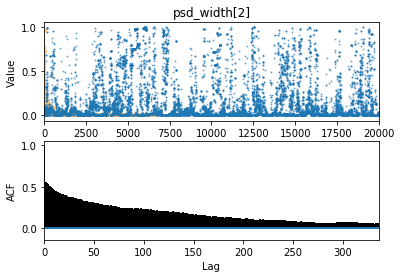

In [12]:
sample.plot_parameter('psd_width', 2, doShow=True)

In [13]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [14]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 413.361949554
Median: 78.485134536
Standard deviation: 2.42952508329
68% credibility interval: [ 76.1384641   81.00249236]
95% credibility interval: [ 73.59488545  83.11095965]
99% credibility interval: [ 71.58459639  84.01633037]


In [15]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 7)

In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 322.612744427
Median: 1.87805875636
Standard deviation: 2.59739251669
68% credibility interval: [ 0.3955298   5.62554209]
95% credibility interval: [ 0.05855919  8.99941102]
99% credibility interval: [  0.02606722  11.56759678]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 526.435221454
Median: 4.33933313068
Standard deviation: 12.8263801236
68% credibility interval: [  0.51247603  21.62195766]
95% credibility interval: [  0.05751195 

In [17]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 5)

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 18613.1639337
Median: 2.53843476432e-30
Standard deviation: 4134471916.41
68% credibility interval: [  8.71433227e-42   5.41880780e-12]
95% credibility interval: [  2.30319788e-65   1.63013236e+01]
99% credibility interval: [  7.63257540e-75   1.31150541e+03]
Posterior summary for parameter ma_coefs  element 2
----------------------------------------------
Effective number of independent samples: 11931.9643089
Median: 4.67419059332e-14
Standard deviation: 138724487199.0
68% credibility interval: [  1.05049700e-23   3.97528962e

In [19]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1444.00332468
Median: 19.7114819416
Standard deviation: 0.122577914374
68% credibility interval: [ 19.60738477  19.81414456]
95% credibility interval: [ 19.46272847  19.94728226]
99% credibility interval: [ 19.34248467  20.11386098]


In [21]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 6)

In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 434.08577546
Median: 0.19090921199
Standard deviation: 0.280640826248
68% credibility interval: [ 0.01113363  0.60686831]
95% credibility interval: [ 0.         0.9266745]
99% credibility interval: [ 0.          0.99598617]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 434.08577546
Median: 0.19090921199
Standard deviation: 0.280640826248
68% credibility interval: [ 0.01113363  0.60686831]
95% credibility interval: [ 0.         0.9266745]
99% credibility interval: [ 0.          0.99598617]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 136.505742125
Median: 0.0
Standard deviation: 0.105681913391
68% credibility int

In [23]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [24]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 413.361949554
Median: 78.485134536
Standard deviation: 2.42952508329
68% credibility interval: [ 76.1384641   81.00249236]
95% credibility interval: [ 73.59488545  83.11095965]
99% credibility interval: [ 71.58459639  84.01633037]


In [25]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 6)

In [26]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 364.098564924
Median: 0.00603118766366
Standard deviation: 0.140141952867
68% credibility interval: [ 0.00072445  0.09647972]
95% credibility interval: [  3.58812880e-04   5.27823027e-01]
99% credibility interval: [  3.12430546e-04   8.61805944e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 351.935520592
Median: 0.00417344923861
Standard deviation: 0.0971254058201
68% credibility interval: [ 0.00064987  0.0591333 ]
95% credibility interval: [ 0.00034475  0.34316292]
99% credibility interval: [  3.08836606e-04   6.59070902e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 297.619539328
Median: 0.0237497998918
Standard

In [27]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [28]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1375.41653792
Median: 0.049977793912
Standard deviation: 0.0620093079214
68% credibility interval: [ 0.03077784  0.09556581]
95% credibility interval: [ 0.0209737   0.21136689]
99% credibility interval: [ 0.01608168  0.41929427]


In [29]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [30]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 222.56837571
Median: 1.14443287216
Standard deviation: 0.232323152426
68% credibility interval: [ 0.9299896   1.39021683]
95% credibility interval: [ 0.77034283  1.68282099]
99% credibility interval: [ 0.70103109  1.84924854]


In [31]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 288.988437195
Median: 0.00036217008857
Standard deviation: 3.38283401594
68% credibility interval: [  1.39183236e-06   5.08609387e-02]
95% credibility interval: [  5.71264908e-09   2.09782179e+00]
99% credibility interval: [  7.08583615e-11   1.70086907e+01]


In [33]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 6)

In [34]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 364.098564924
Median: (-0.0378950697131-3.12677730876j)
Standard deviation: 1.97094860543
68% credibility interval: [-0.60619995-1.24051567j -0.00455186-4.4856323j ]
95% credibility interval: [ -3.31640989e+00+0.j          -2.25448782e-03-5.43977875j]
99% credibility interval: [ -5.41488644e+00-0.01928111j  -1.96305902e-03-0.01111882j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 351.935520592
Median: (-0.0262225549363+0.801889917201j)
Standard deviation: 1.86593274146
68% credibility interval: [-0.37154546+2.35233085j -0.00408326+0.34410967j]
95% credibility interval: [-2.15615623+4.32020362j -0.00216612+0.j        ]
99% credibility interval: [ -4.14106461e+00+3.03807446j  -1.94047762e-03+2.16688967j]
Posterior sum

Plotting 2d PDF w KDE


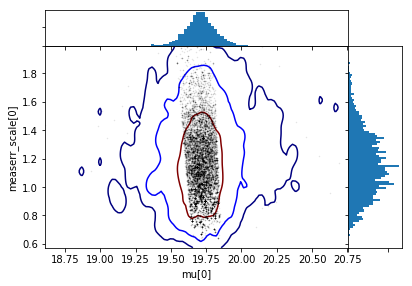

In [35]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


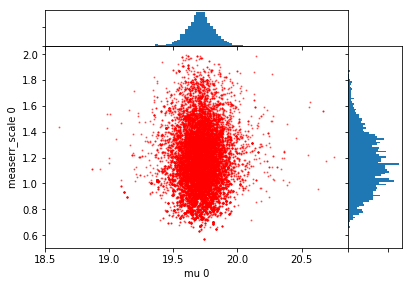

In [36]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


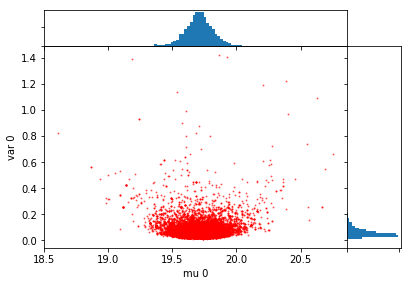

In [37]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


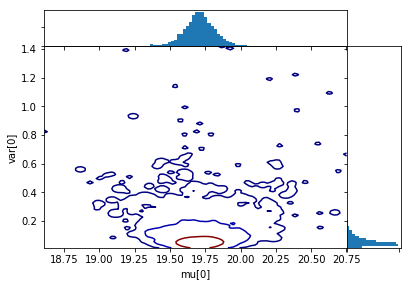

In [38]:
sample.plot_2dkde('mu', 'var', doShow=True)

Text(0.5,1,'Interpolacion, camino simulado')

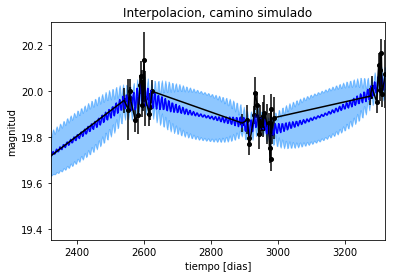

In [39]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

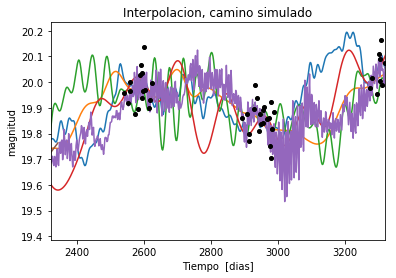

In [40]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')